### TP1 : Source coding

On crée nous même un alphabet A avec les probas associés, on génère un vecteur aléatoire avec les symboles de l'alphabet. On calcule l'entropie, puis l'entropie réelle à partir de l'apparition des symboles dans le vecteur. 

In [68]:
Alphabet = {'A': 0.36, 'B': 0.12,'C': 0.35,'D': 0.04,'E': 0.09,'F': 0.01,'G': 0.03}

In [69]:
import random

def genVecteur(n, Alpha):
    tab = []
    for i in range(n) :
        r = random.randint(0,999999999)
        r = r%100
        val = 0.0
        for cle,valeur in Alpha.items():
            val += valeur*100
            if (r <= val) :
                tab.append (cle)
                break
    return tab 


In [70]:
import math as m

def entropieReelle(X, Alpha):
    # print(X)
    dico = {}
    ent = 0
    for key in Alpha:
        dico[key] = 0
    for i in range (len(X)):
        dico[X[i]]=dico[X[i]]+1
    for cle, valeur in dico.items():
        pReelle = valeur/len(X)
        if pReelle != 0:
            ent = ent + pReelle*m.log(pReelle, 2)
    return -ent

In [71]:
entropieReelle(genVecteur(100, Alphabet), Alphabet)

2.050726359038756

In [72]:
Alphabet2 = {'A': 0.5, 'B': 0.5 }

entropieReelle(genVecteur(1000, Alphabet2), Alphabet2)

0.9999884584088952

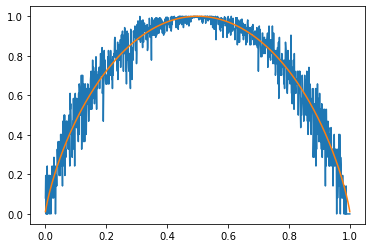

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def affichage(n):
    Lx = np.linspace(0.001,0.999,n)
    LyR=[]
    LyT=[]
    for a in Lx:
        Alphabet3 = {'0': a, '1': 1-a}
        LyT.append(-(a*m.log(a,2) + (1-a)*m.log(1-a,2)))
        LyR.append(entropieReelle(genVecteur(100, Alphabet3), Alphabet3))
    plt.plot(Lx, LyR)
    plt.plot(Lx, LyT)
    plt.show()
    
affichage(1000)

Question 4

            (p00               p10)
            (p01               p11)

(p0     p1) (p0*p00+p1*p01     p0*p10+p1*p11)

On a donc p0 = p0*p00+p1*p01 en régime stationnaire

or p1 = 1-p0

On obtient donc p0*p00 + (1-p0)*p01 = p0

p0*(p00-1-p01)=-p01

p0=p01/(1+p01-p00)
p1=(1-p00)/(1+p01-p00)

H(xk)   = Σ (xk|x(k-1)).p(x(k-1))
        = H(xk|x(k-1)=0).p(x(k-1)=0) + H(xk|x(k-1)=1).p(x(k-1)=1)
        = H(xk|x(k-1)=0).p0 + H(xk|x(k-1)=1).p1
        = -[ p(xk=0|x(k-1)=0).log2(p(xk=0|x(k-1)=0)) + p(xk=1|x(k-1)=0).log2(p(xk=1|x(k-1)=0)) ].p0
          -[ p(xk=0|x(k-1)=1).log2(p(xk=0|x(k-1)=1)) + p(xk=1|x(k-1)=1).log2(p(xk=1|x(k-1)=1)) ].p1
        = -[ p00.log2(p00) + p01.log2(p01) ].p0 - [ p10.log2(p10) + p11.log2(p11) ].p1
          

In [2]:
from PIL.Image import *

im = open("image.png")
px = im.load()
blanc = 0
noir = 1
(larg, longueur) = im.size
for i in range (larg):
    for j in range (longueur):
        if px[i, j]==1:
            blanc+=1
        else: 
            noir+=1
print (blanc, noir)

8000222 414779


In [8]:
from PIL import Image as Im
import numpy as np

def transition(fichier):
    img = Im.open(fichier)
    img_data = np.asarray(img)
    nbTrans = 0
    it = 0
    nzu = 0
    for i in range(len(img_data)):
        for j in range(len(img_data[0])):
            if img_data[i][j] == 0 and img_data[(i+1)%len(img_data)][j] == 0:#si on a un pixel noir et que le pixel "proche" associé est noir
                it += 1 #on augmente le compteur de pixel noir associé à un pixel noir
            if img_data[i][j] == 1 and img_data[(i+1)%len(img_data)][j] == 0:#si on a un pixel blanc et que le pixel "proche" associé est noir
                nzu += 1#on augmente le compteur de pixel blanc associé à un pixel noir
    nbTrans = len(img_data)*len(img_data[0]) #on augmente le nombre de pixel vu
    Pi = [[it/nbTrans, 1-(it/nbTrans)], [nzu/nbTrans, 1-(nzu/nbTrans)]]
    return Pi

path = r"./image.png"

print(transition(path))

[[0.03905216874628639, 0.9609478312537136], [0.010238146167557933, 0.9897618538324421]]
